In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/acc-data/325_550_715 RPM.mat
/kaggle/input/force-715rpm/T1_400doc_715RPM_22-01-2024.tdms
/kaggle/input/force-715rpm/T1_800doc_715RPM_22-01-2024.tdms
/kaggle/input/force-715rpm/T1_200doc_715RPM_22-01-2024.tdms
/kaggle/input/force-715rpm/T1_1000doc_715RPM_22-01-2024.tdms
/kaggle/input/force-715rpm/T1_1200doc_715RPM_22-01-2024.tdms
/kaggle/input/force-715rpm/T1_600doc_715RPM_22-01-2024.tdms
/kaggle/input/force-data/T1_400doc_325RPM_22-01-2024.tdms
/kaggle/input/force-data/T1_200doc_325RPM_22-01-2024.tdms
/kaggle/input/force-data/T1_600doc_325RPM_22-01-2024.tdms
/kaggle/input/force-data/T1_800doc_325RPM_22-01-2024.tdms
/kaggle/input/force-data/T1_700doc_325RPM_22-01-2024.tdms


In [4]:
pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.6 MB/s eta 0:00:00a 0:00:01
^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install nptdms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.6/180.6 kB 4.1 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for nptdms: filename=npTDMS-1.9.0-py3-none-any.whl size=107810 sha256=755ee71d83cb9e4a342a6294efd5998998c235afb85fd80d2ca75497d0568130
  Stored in directory: /root/.cache/pip/wheels/82/8b/23/e2e53cf0a7f0d2a0b303f2a0bc223dd45b6775169bcfb3feda
Successfully built nptdms
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
from nptdms import TdmsFile
from nptdms import tdms

In [7]:
import matplotlib.pyplot as plt

In [8]:
b= 0
def z1(points,a):
    return points.max()

def z2(points,a):
    return points.min()

def z3(points,a):
    return a[0]-a[1]

def z4(points,a):
    return points.mean()

def z5(points,a):
    return np.abs(points).max()

def z6(points,a):
    return a[4] - a[3]

def z7(points,a):
    b = 0
    for i in range(15):
        b = b + ((points[i] - a[3])**2)
        
    b1 = float(b/14)
    return b1 ** 0.5

def z8(points,a):
    b = 0
    for i in range(15): 
        b += (points[i])**2
    b = float(b/15)
    return b ** 0.5
    b = 0
    
def z9(points,a):
    sum = 0
    points = np.sqrt(np.abs(points))
    sum = points.sum()
    sum = float(sum/15)
    return sum ** 2

def z10(points,a):
    b = 0
    for i in range(15): 
        b += (points[i] - a[3]) ** 3
    b = float(b/14)
    return float(b/(a[6]**3))
    b = 0
    
def z11(points,a):
    b = 0
    for i in range(15): 
        b += (points[i] - a[3]) ** 4
    b = float(b/14)
    return float(b/(a[6]**4))
    b = 0
    
def z12(points,a):
    return float(a[4]/a[7])
    
def z13(points,a):
    return float(a[4]/a[8])
    

def z14(points,a):
    def absosum(points):
        absosum1 = 0
        points = np.abs(points)
        absosum1 = points.sum()
        absosum1 = absosum1 / 15
        return absosum1
    return float(a[7] / (absosum(points)))
    
def z15(points,a):
    def absosum(points):
        absosum1 = 0
        points = np.abs(points)
        absosum1 = points.sum()
        absosum1 = absosum1 / 15
        return absosum1
    return float(a[4] / (absosum(points)))

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def process_and_plot(tdms_file_path, time_period):
    tdms_file = TdmsFile.read(tdms_file_path)
    df = tdms_file.as_dataframe(time_index=True, absolute_time=False, scaled_data=False,
                                arrow_dtypes=False)

    df['F_net'] = ((df["/'Measurement Data'/'Feed Force - Fx (Newton)'"]**2) +
                   (df["/'Measurement Data'/'Radial Force - Fy (Newton)'"]**2) +
                   (df["/'Measurement Data'/'Cutting Force - Fz (Newton)'"]**2))**0.5
    data_points_per_interval = int(time_period / 0.0001)  # 0.1843 seconds / 0.0001 seconds per data point

# Calculate the number of intervals
    num_intervals = len(df) // data_points_per_interval

    # Calculate standard deviation for each interval
    standard_deviations = []
    F_net = []
    for i in range(num_intervals):
        start_index = i * data_points_per_interval
        end_index = (i + 1) * data_points_per_interval
        interval_data = df['F_net'].iloc[start_index:end_index]
        Force_net = interval_data.mean()
        std_dev = interval_data.std()
        standard_deviations.append(std_dev)
        F_net.append(Force_net)

    # Create a DataFrame containing the standard deviations for each interval
    interval_duration =  time_period # Interval duration in seconds
    intervals_df = pd.DataFrame({
        'Interval': range(1, num_intervals + 1),
        'Standard_Deviation': standard_deviations,
        'F_net' : F_net,
        'Time_Start': [i * interval_duration for i in range(num_intervals)],
        'Time_End': [(i + 1) * interval_duration for i in range(num_intervals)]
    })

    points = df['F_net'].to_numpy()
    num = int(10000 * time_period)
    time = int(len(df) // num)
    array = np.zeros((time, 15))
    for i in range(time):
        a = np.empty(15)
        points_i = points[num * i:num * i + num]
        a[0] = z1(points_i, a)
        a[1] = z2(points_i, a)
        a[2] = z3(points_i, a)
        a[3] = z4(points_i, a)
        a[4] = z5(points_i, a)
        a[5] = z6(points_i, a)
        a[6] = z7(points_i, a)
        a[7] = z8(points_i, a)
        a[8] = z9(points_i, a)
        a[9] = z10(points_i, a)
        a[10] = z11(points_i, a)
        a[11] = z12(points_i, a)
        a[12] = z13(points_i, a)
        a[13] = z14(points_i, a)
        a[14] = z15(points_i, a)
        array[i] = a

    array_T = array.T
    print(array_T.shape)

    # Define the number of intervals
    num_intervals = len(array_T[0])
    interval_size = num_intervals // time

    # Calculate the ratio of standard deviations for each interval
    ratio_arr = []
    for i in range(time):
        start_index = i * interval_size
        end_index = (i + 1) * interval_size
        std_dev_7 = np.std(array_T[7, i-1:i+1])
        std_dev_12 = np.std(array_T[12,i-1:i+1])
        if std_dev_12 != 0:  
            ratio = std_dev_7 / std_dev_12
            ratio_arr.append(ratio)
        else:
            ratio_arr.append(0)  

    # Plot the data
    plt.plot(range(1, time + 1), ratio_arr, label='Ratio of Std Devs')
    plt.xlabel('Interval')
    plt.ylabel('Ratio')
    plt.title('Ratio of Standard Deviations for array_T[7] and array_T[12]')
    plt.legend()
    plt.show()
    for i in range(0,15):
        plt.plot(intervals_df.index,array_T[i], label=f'Parameter #{i+1}')
        plt.xlabel('X-axis Label')
        plt.ylabel('Y-axis Label')
        plt.title('Plot of NumPy Array')
        plt.legend()
        plt.show()

(15, 335)


/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


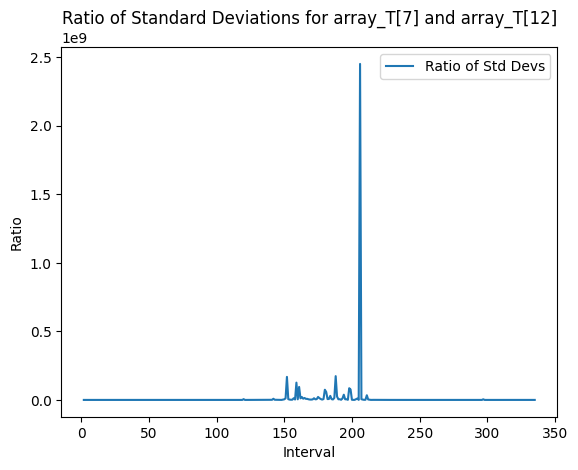

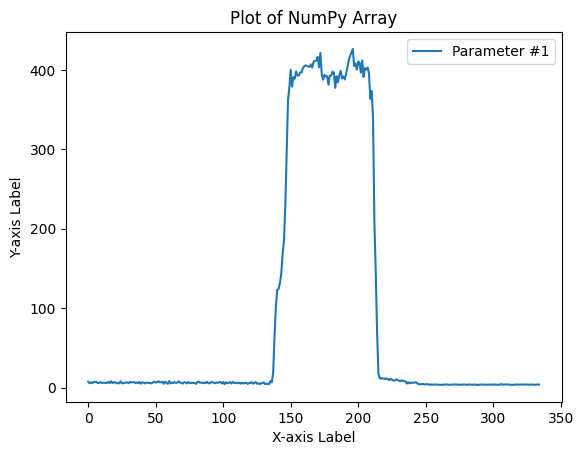

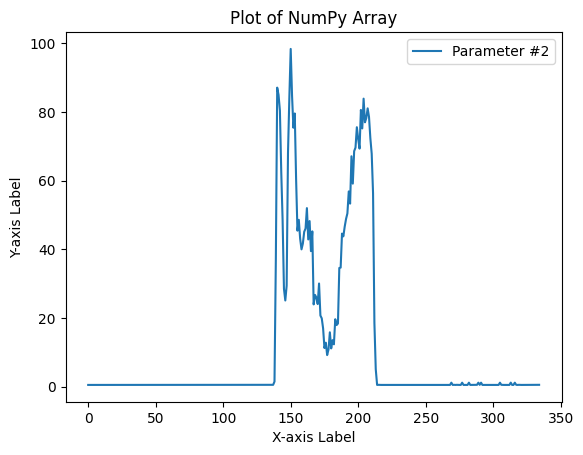

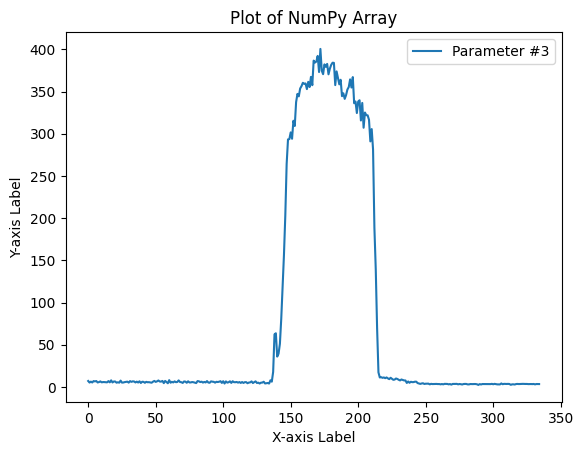

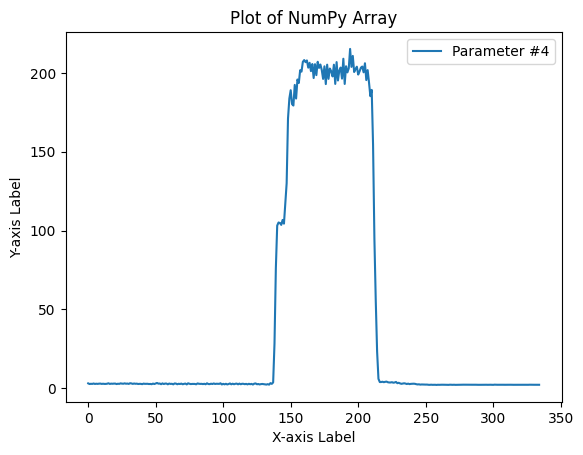

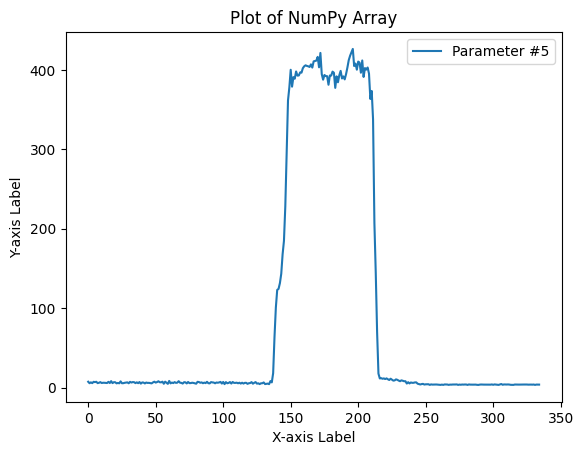

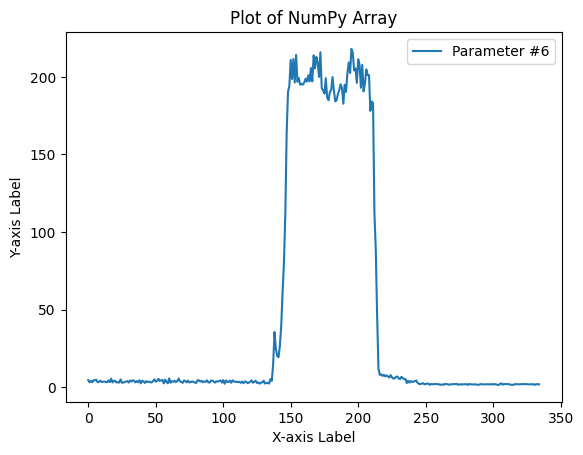

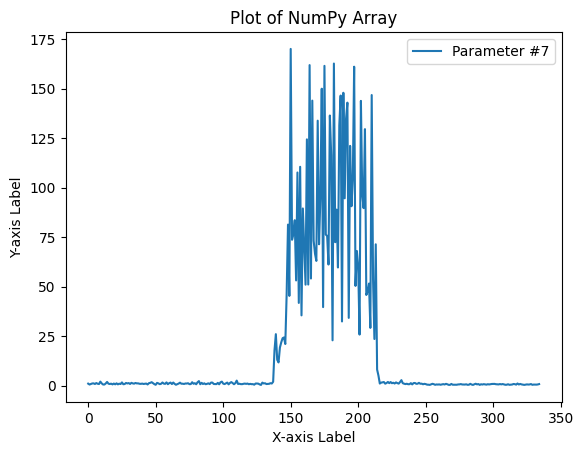

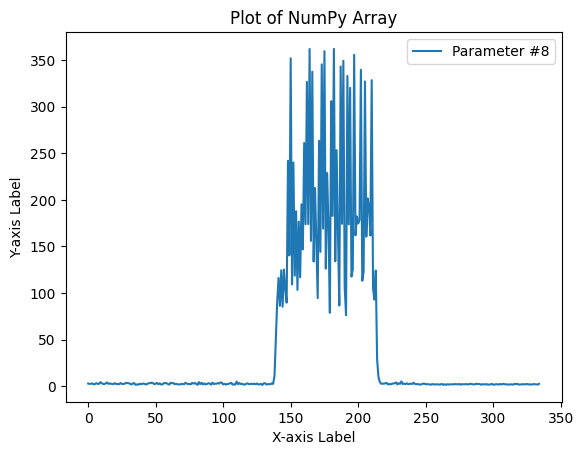

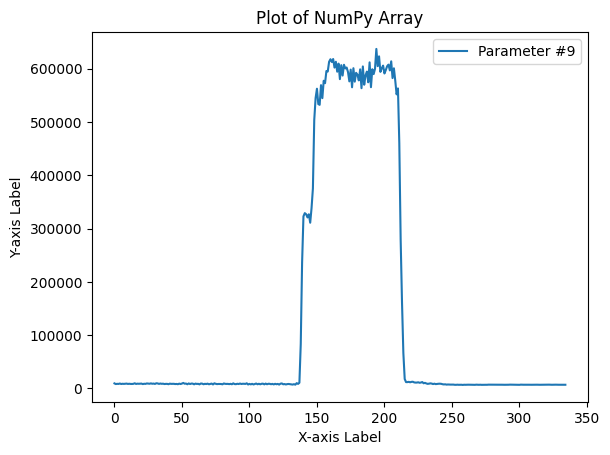

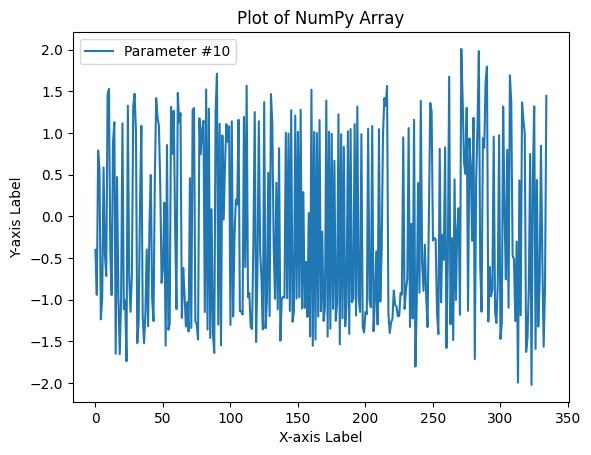

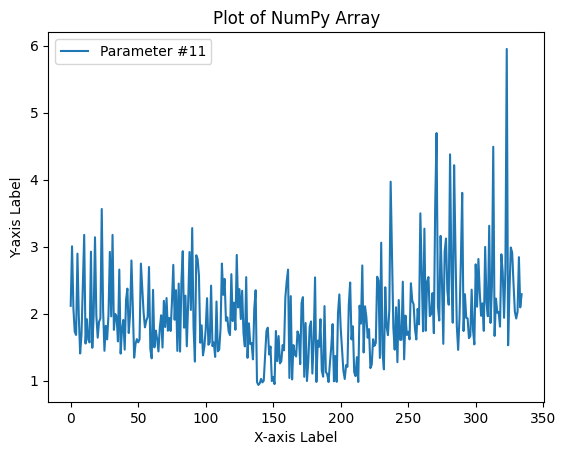

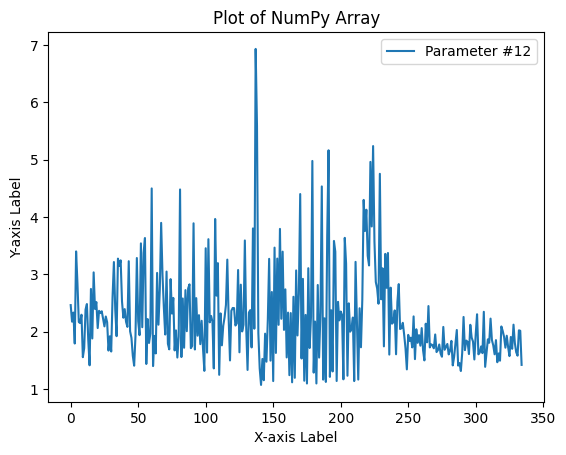

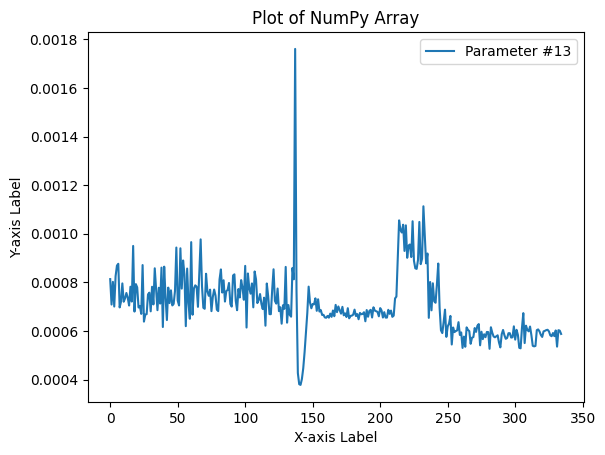

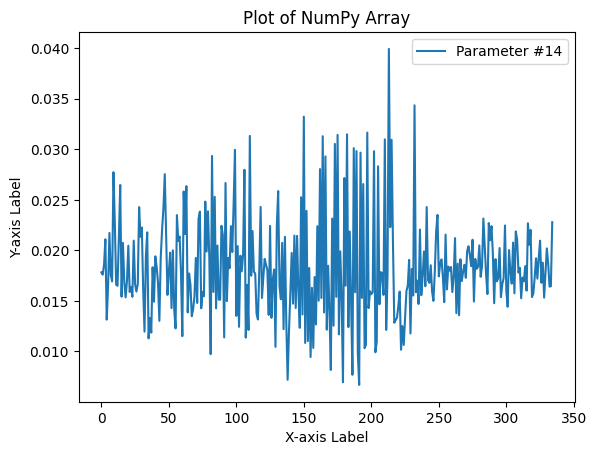

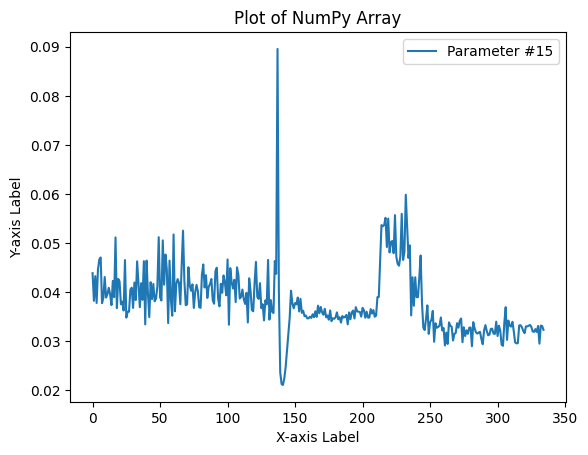

In [11]:
tdms_file_path = "/kaggle/input/force-715rpm/T1_1200doc_715RPM_22-01-2024.tdms"
time_period = 0.084
process_and_plot(tdms_file_path, time_period)

(15, 376)


/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


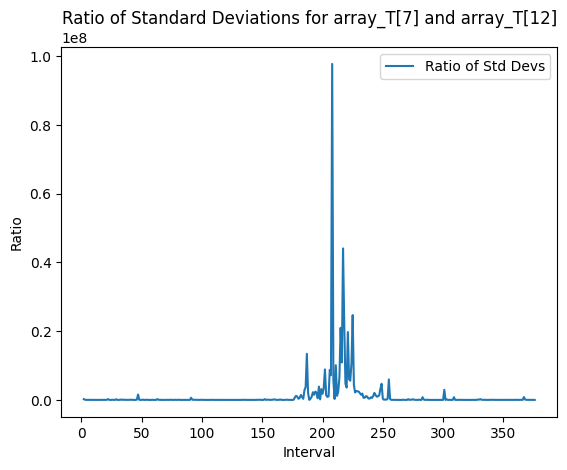

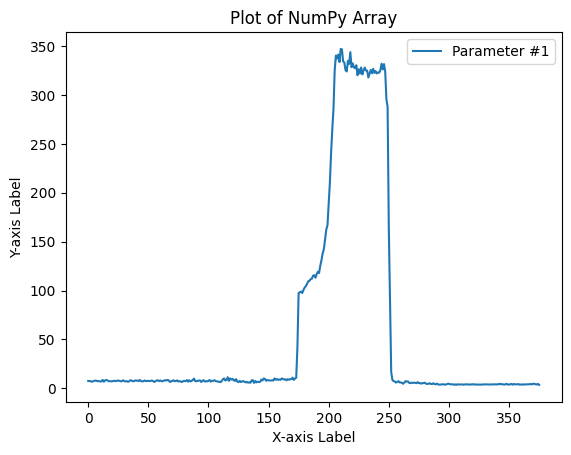

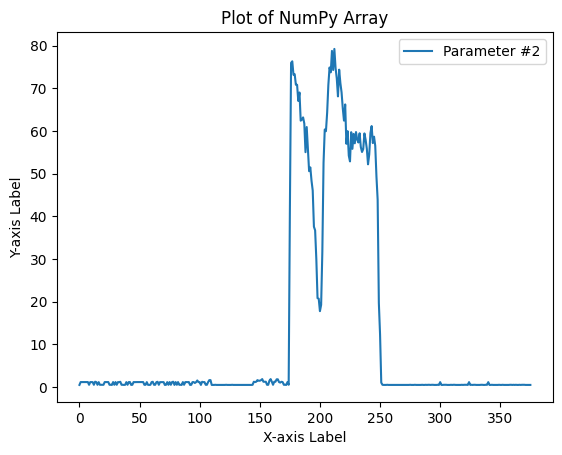

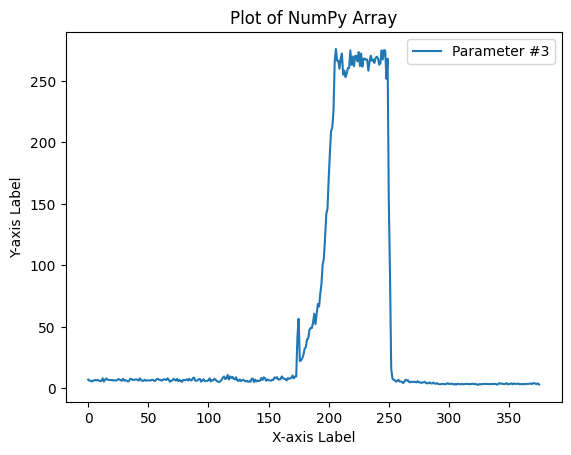

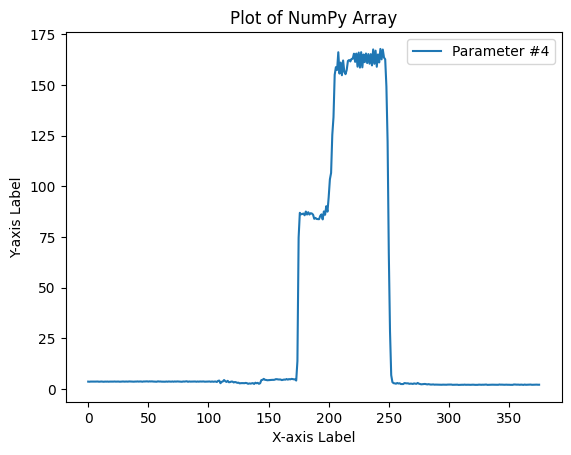

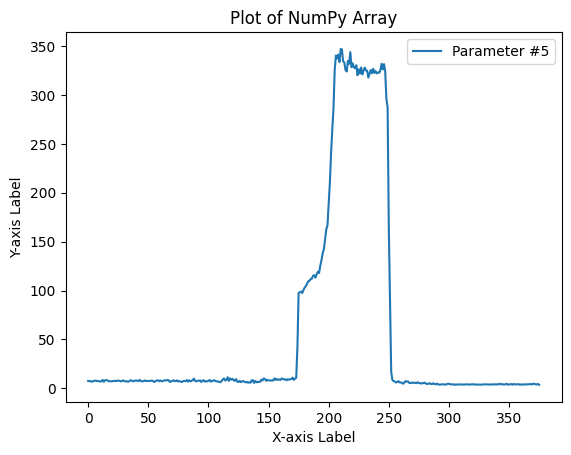

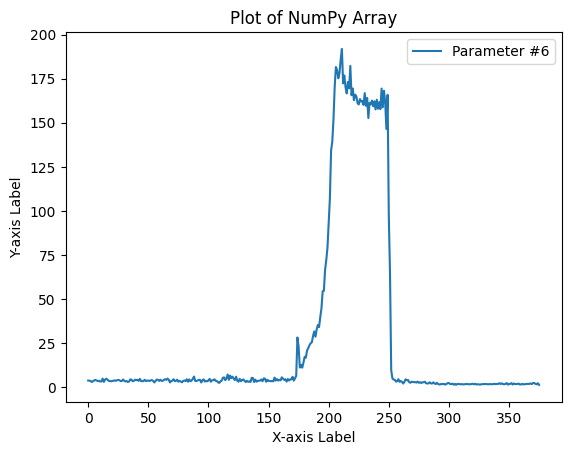

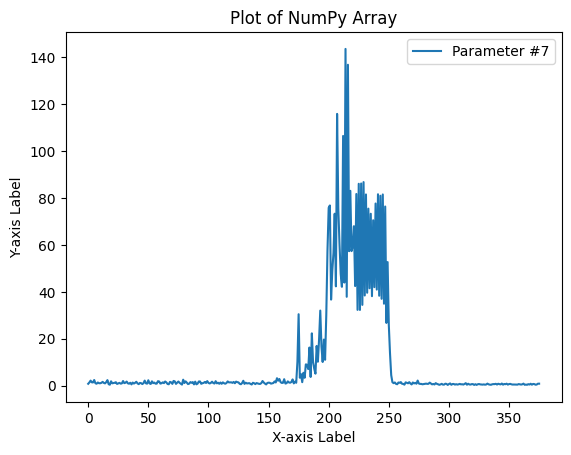

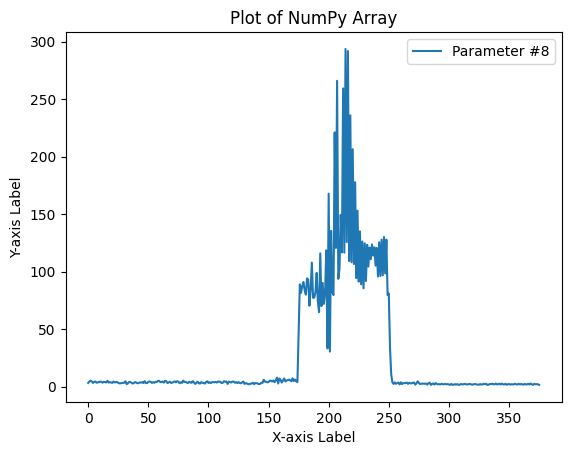

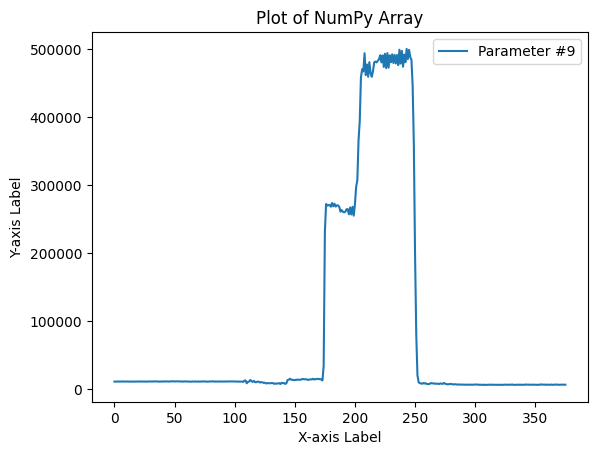

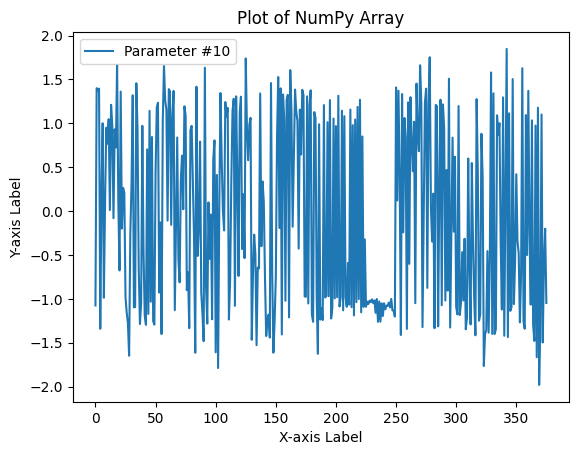

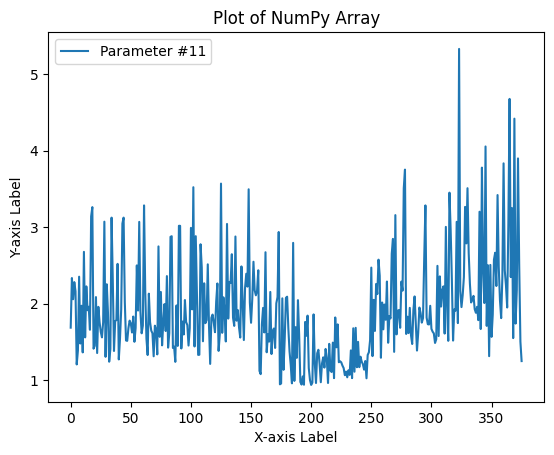

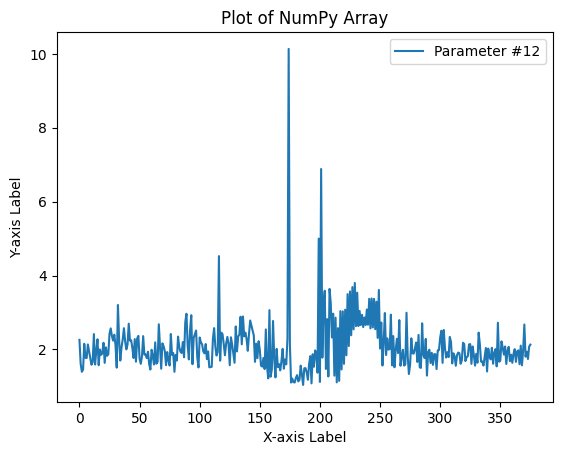

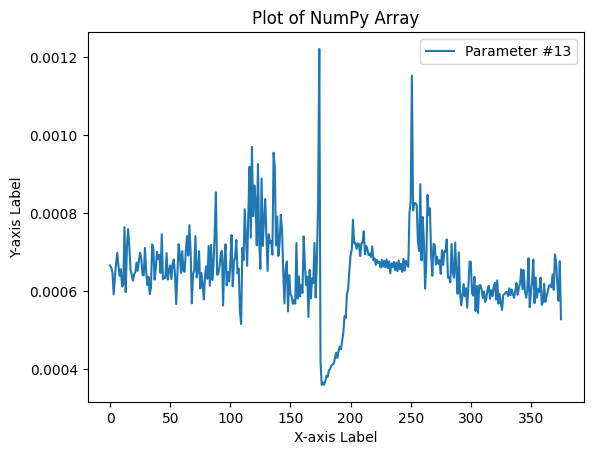

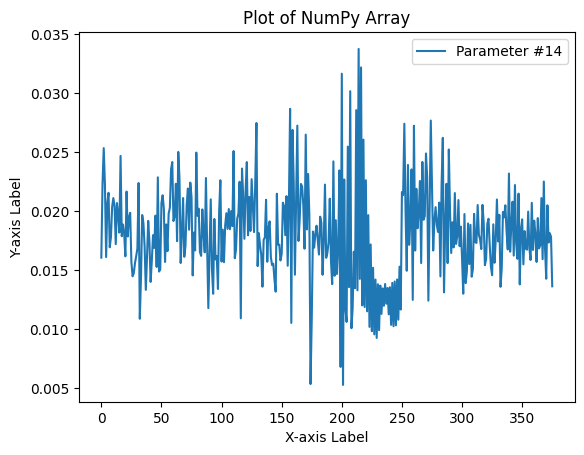

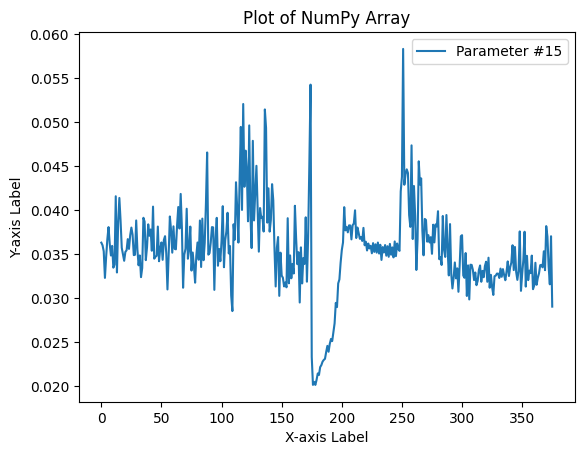

In [12]:
tdms_file_path = "/kaggle/input/force-715rpm/T1_1000doc_715RPM_22-01-2024.tdms"
time_period = 0.084
process_and_plot(tdms_file_path, time_period)

(15, 216)


/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


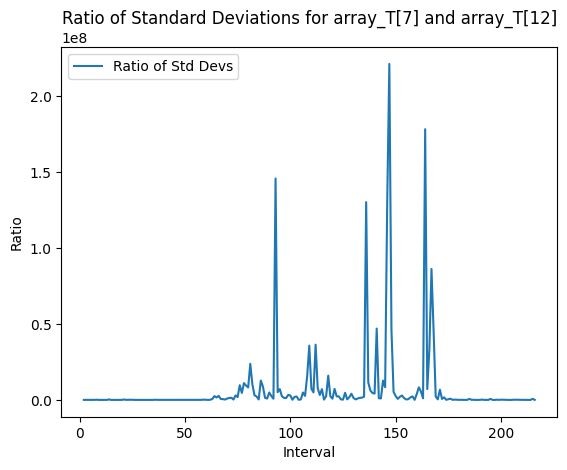

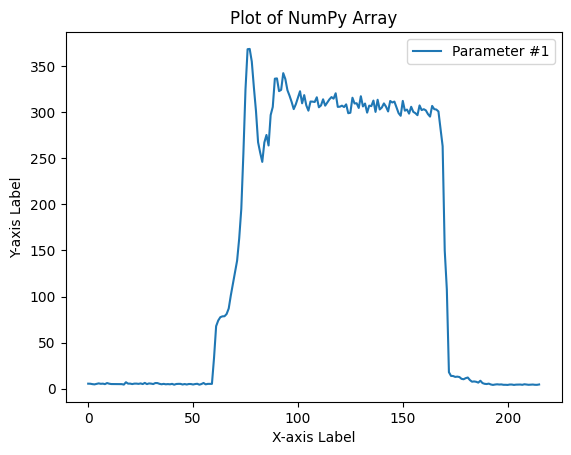

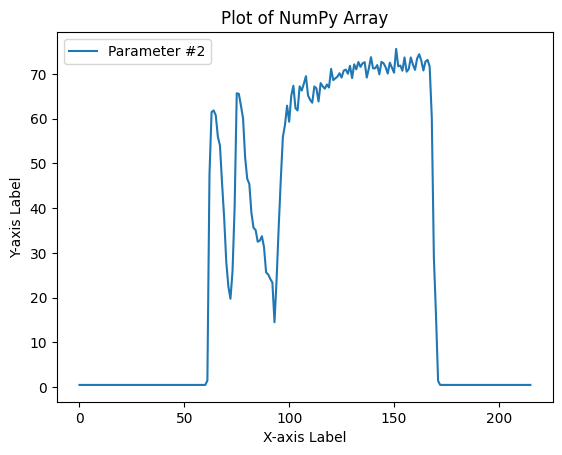

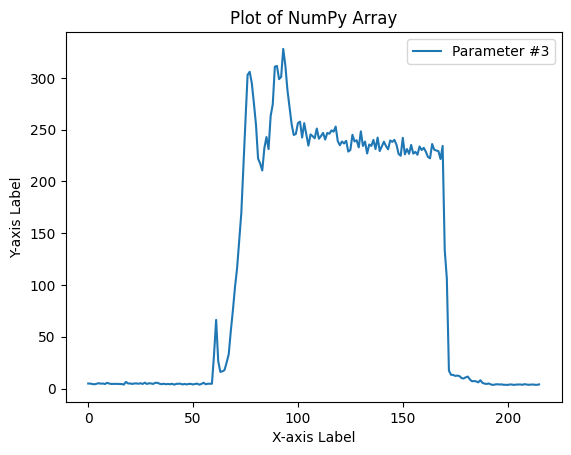

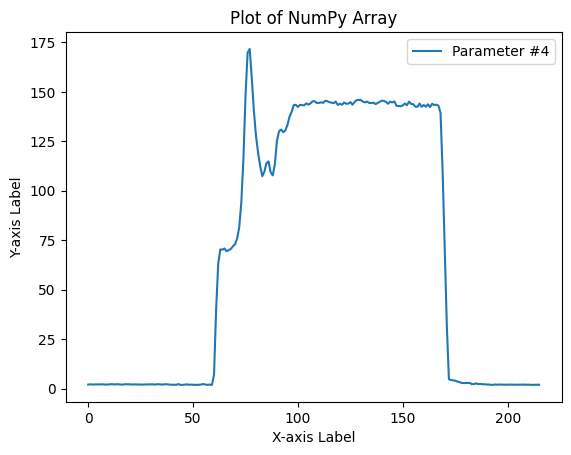

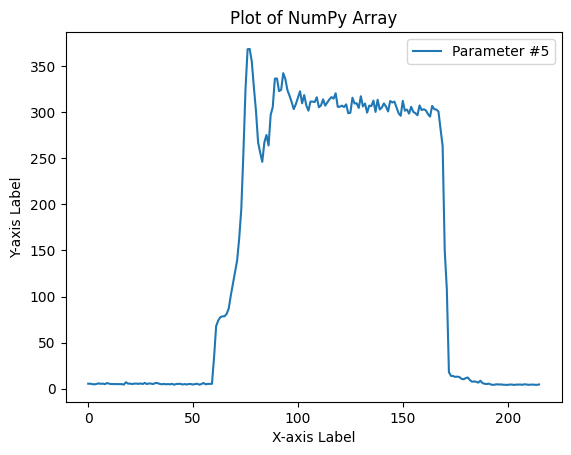

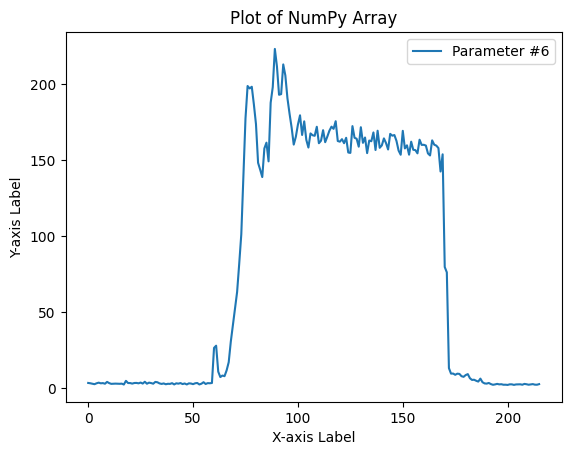

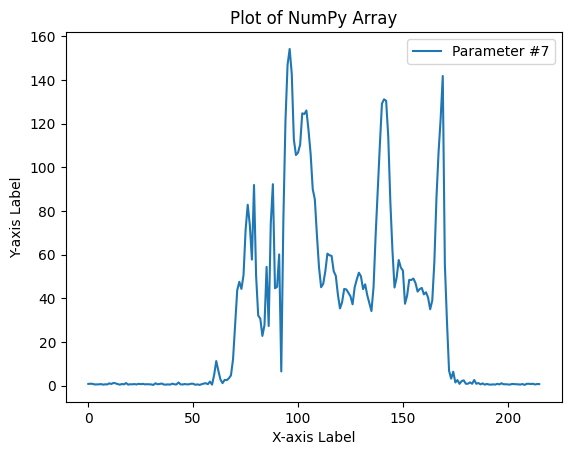

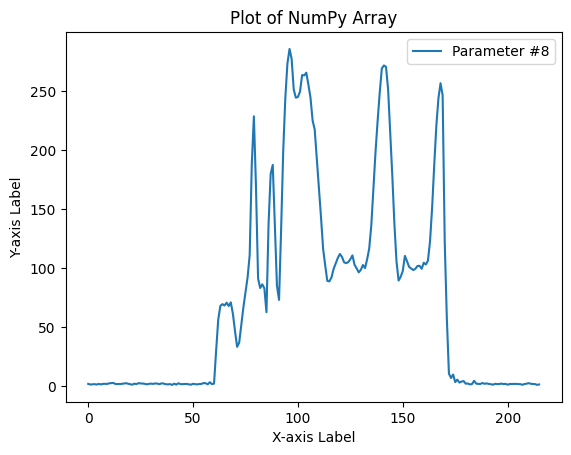

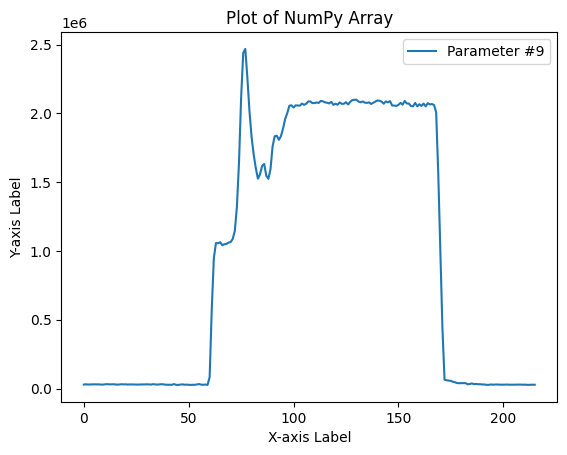

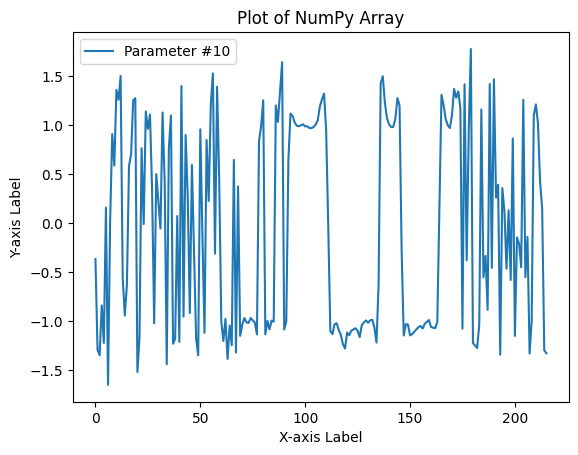

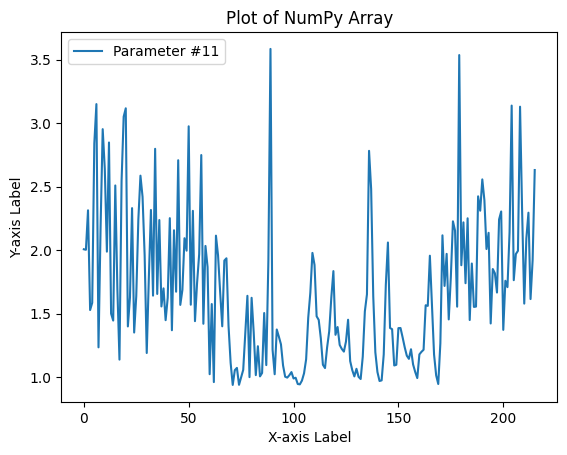

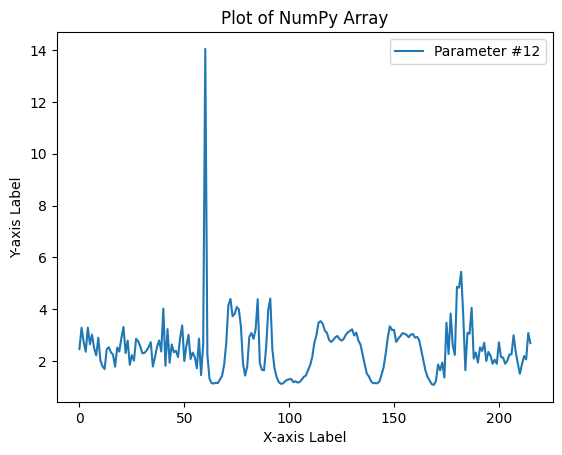

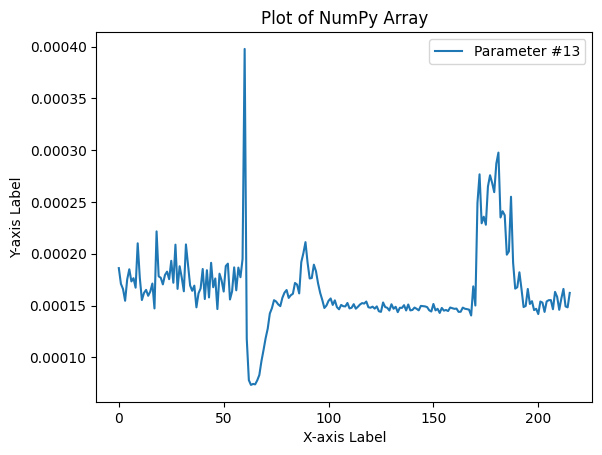

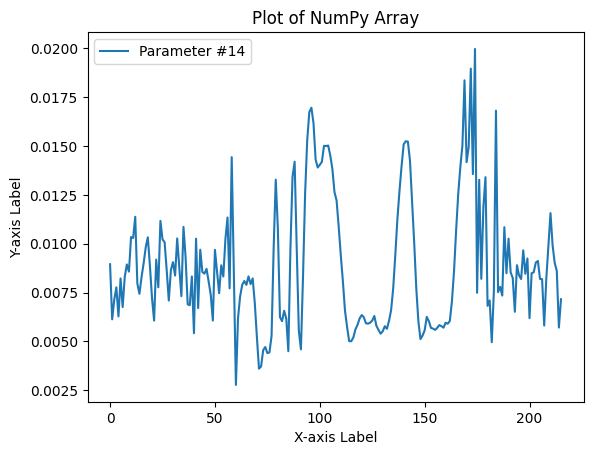

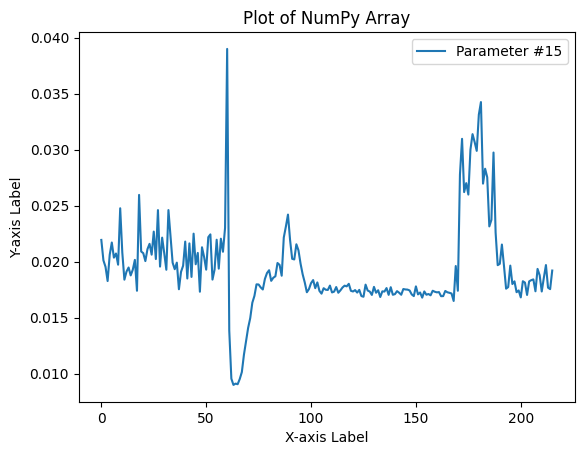

In [14]:
tdms_file_path = "/kaggle/input/force-data/T1_800doc_325RPM_22-01-2024.tdms"
time_period = 0.184
process_and_plot(tdms_file_path, time_period)

(15, 285)


/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


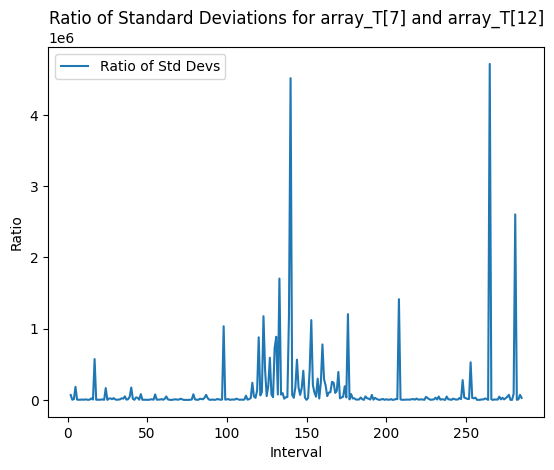

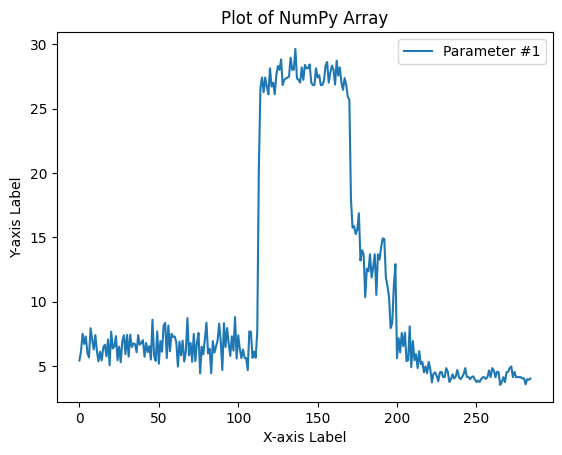

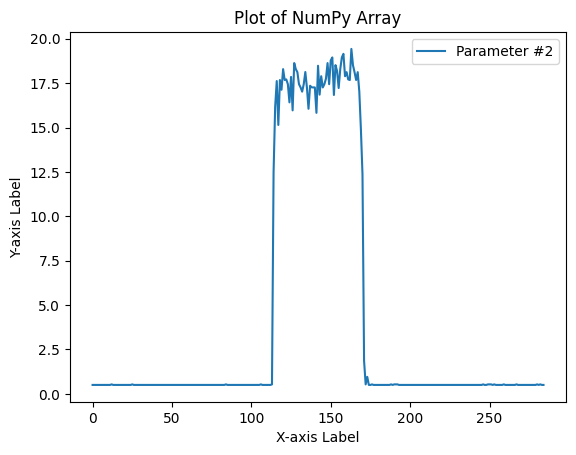

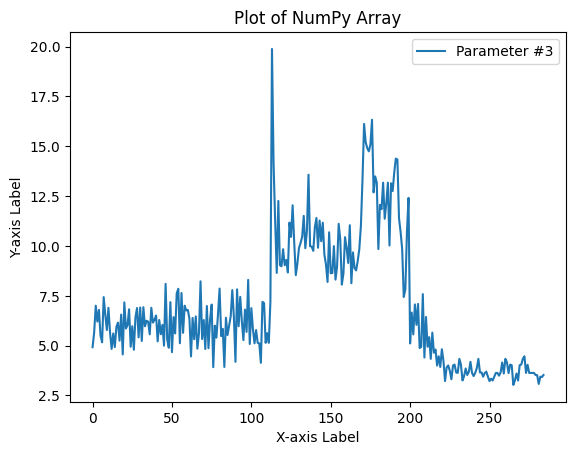

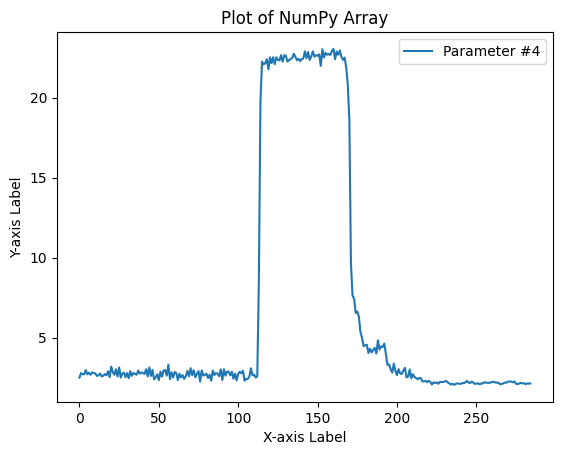

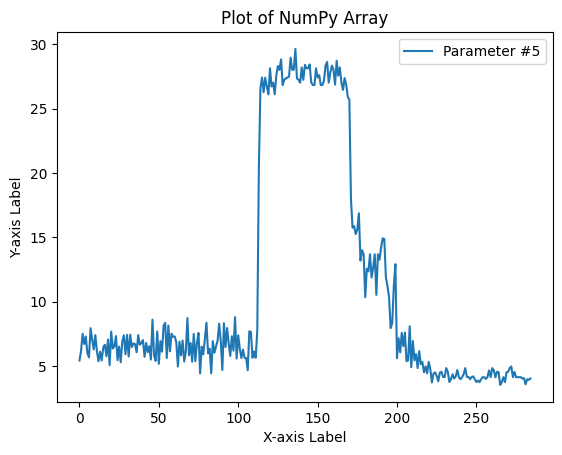

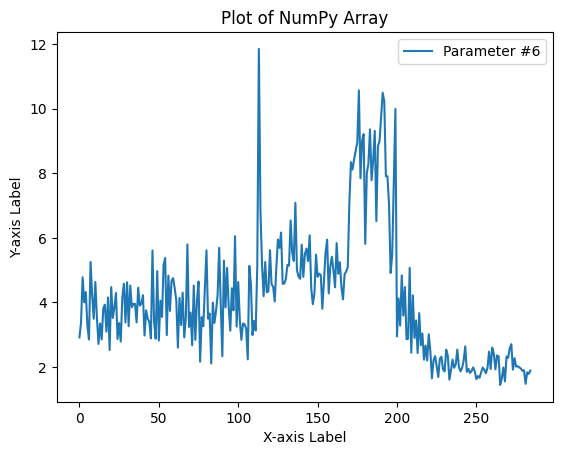

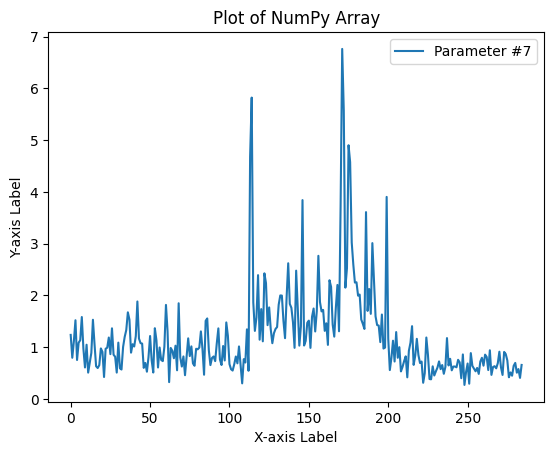

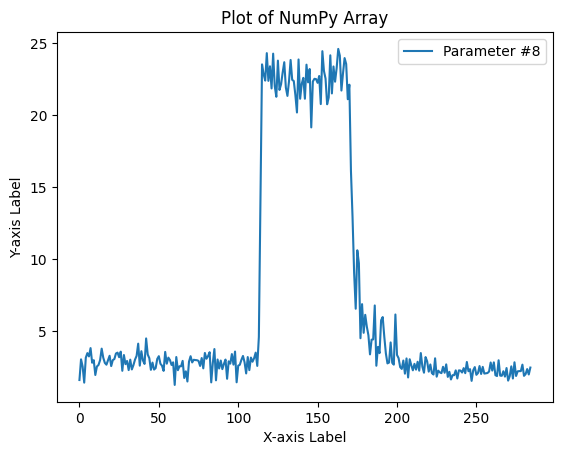

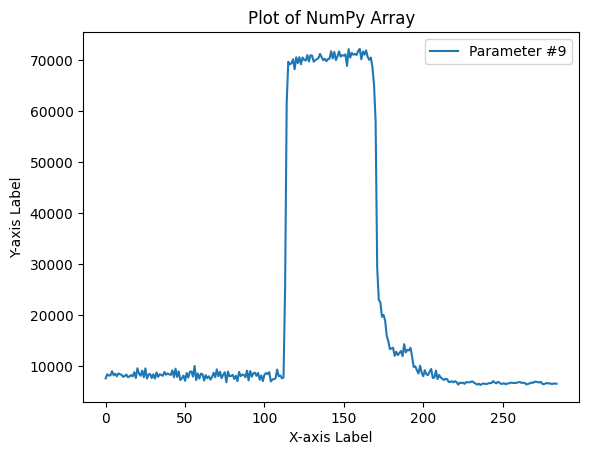

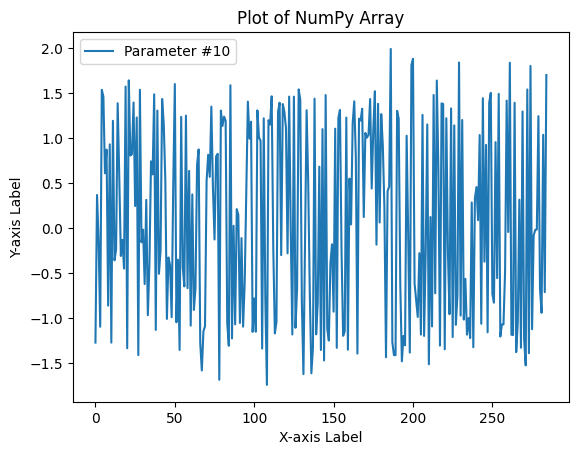

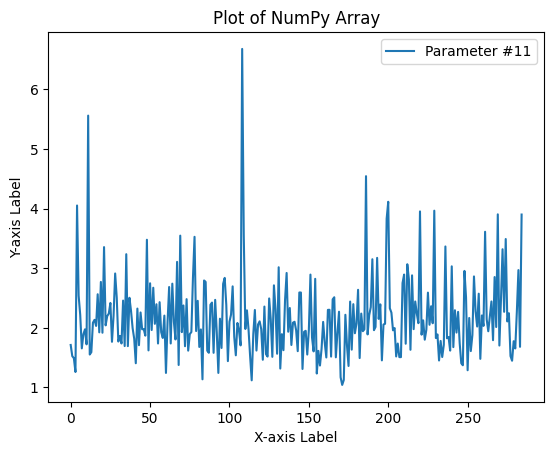

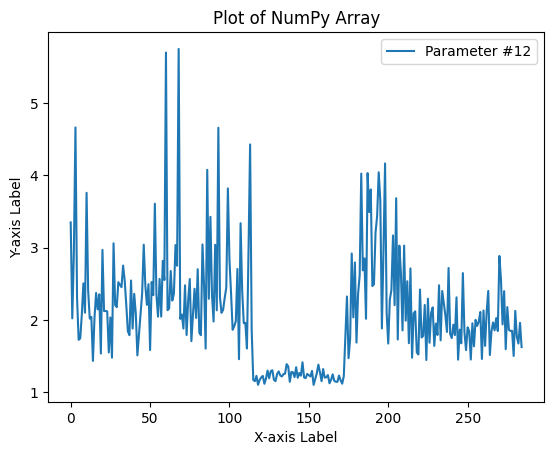

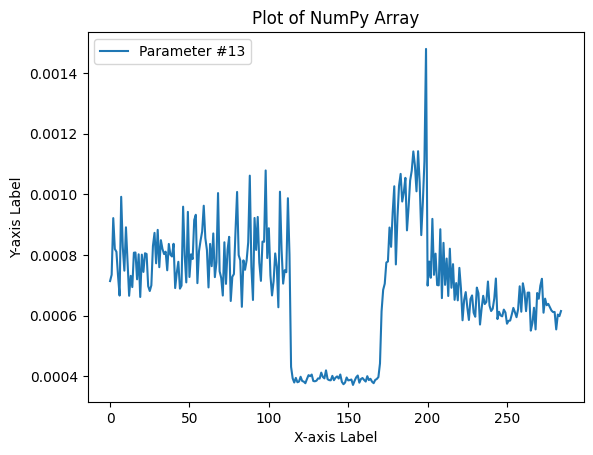

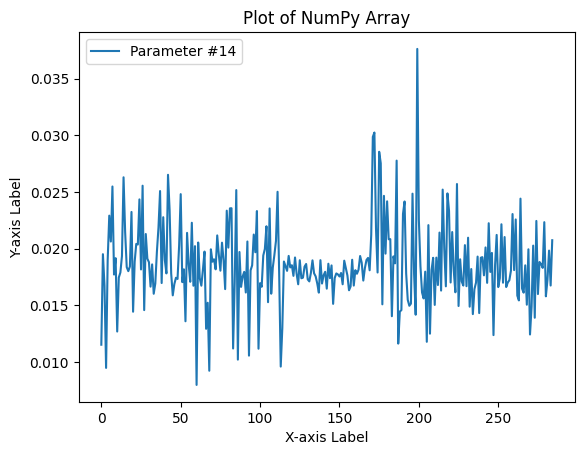

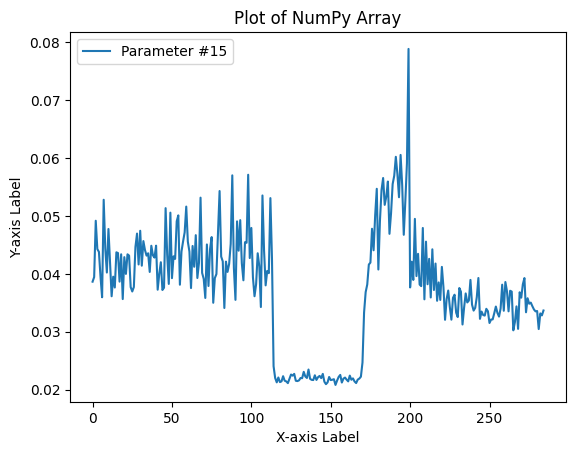

In [16]:
tdms_file_path = "/kaggle/input/force-715rpm/T1_200doc_715RPM_22-01-2024.tdms"
time_period = 0.084
process_and_plot(tdms_file_path, time_period)